In [27]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
import datetime as dt
import main
import calendar

In [28]:
covid  = pd.read_csv("WHO-COVID-19-global-data.csv")
production = pd.read_excel("US-Monthly_NG_Production.xls")
consumption = pd.read_excel("US-Monthly_NG_Consumption.xls")
import_export = pd.read_excel("US-Monthly_NG_import_export.xls")

In [29]:
df = main.get_country_data(covid, "US")

In [30]:

df = df.rename(columns={"Date_reported":"Date"})

In [31]:
year =[2020,2021]
df = main.process_dataframe(df, year)
df = df.groupby(['year','month']).sum()
df.reset_index(inplace =True)
df

,year,month,New_cases,Cumulative_cases
0,2020,1,3,22
1,2020,2,54,574
2,2020,3,174269,1001162
3,2020,4,858488,18449001
4,2020,5,757926,44729652
5,2020,6,823417,64664757
6,2020,7,1886868,109970981
7,2020,8,1524581,165459769
8,2020,9,1201008,199036427
9,2020,10,1820944,249816987


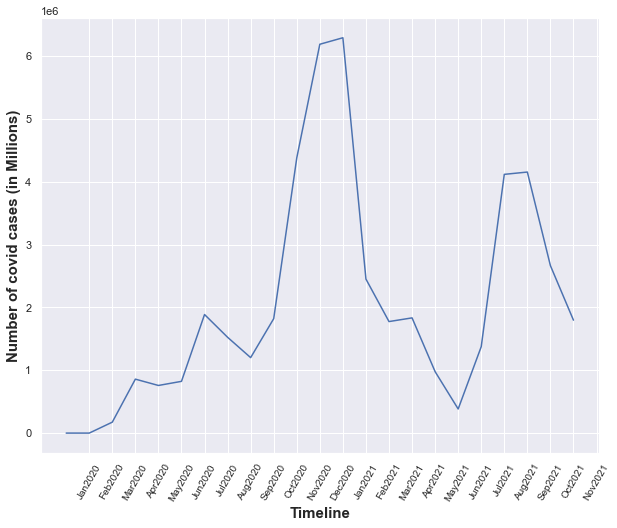

In [32]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.lineplot(data =df['New_cases'])
arr= np.arange(1,24,step=1)
plt.xticks(arr,labels=['Jan2020','Feb2020','Mar2020','Apr2020','May2020','Jun2020','Jul2020','Aug2020','Sep2020','Oct2020','Nov2020','Dec2020',
                      'Jan2021','Feb2021','Mar2021','Apr2021','May2021','Jun2021','Jul2021','Aug2021','Sep2021','Oct2021','Nov2021'],rotation=60,fontsize=10)
plt.xlabel("Timeline", fontsize=15, fontweight = "bold")
plt.ylabel("Number of covid cases (in Millions)", fontsize=15, fontweight="bold")
plt.show()

In [33]:
production = main.process_dataframe(production, year)
consumption = main.process_dataframe(consumption, year)
import_export = main.process_dataframe(import_export, year)

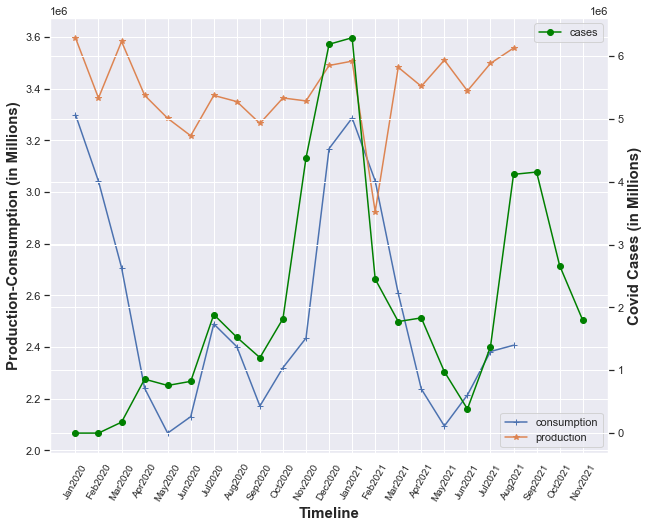

In [34]:
fig, ax = plt.subplots()
ax.plot(consumption['U.S. Natural Gas Total Consumption (MMcf)'], label='consumption', marker ='+')
ax.plot(production['U.S. Natural Gas Gross Withdrawals (MMcf)'], label="production", marker ='*')
plt.legend()
arr= np.arange(0,23,step=1)
plt.xticks(arr,labels=['Jan2020','Feb2020','Mar2020','Apr2020','May2020','Jun2020','Jul2020','Aug2020','Sep2020','Oct2020','Nov2020','Dec2020',
                      'Jan2021','Feb2021','Mar2021','Apr2021','May2021','Jun2021','Jul2021','Aug2021','Sep2021','Oct2021','Nov2021'],rotation=60,fontsize=10)
plt.ylabel("Production-Consumption (in Millions)", fontsize=15, fontweight='bold')
plt.xlabel("Timeline", fontsize=15, fontweight= 'bold')

ax2 = ax.twinx()
ax2.plot(df['New_cases'], label = 'cases', color = 'green', marker='o')
ax2.legend()
plt.xlabel("Timeline", fontsize=20)
plt.ylabel("Covid Cases (in Millions)", fontsize =15, fontweight='bold')
plt.show()

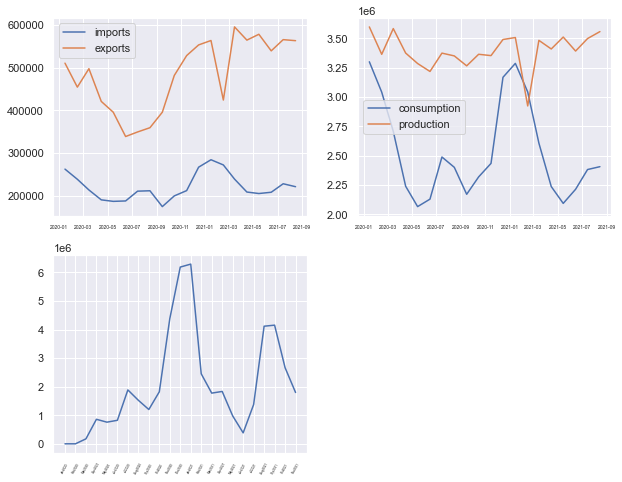

In [35]:
plt.subplot(2,2,1)
plt.plot(import_export['Date'], import_export['U.S. Natural Gas Imports (MMcf)'], label='imports')
plt.plot(import_export['Date'], import_export['U.S. Natural Gas Exports (MMcf)'], label= 'exports')
plt.legend()
plt.xticks(fontsize=5)

plt.subplot(2,2,2)
plt.plot(consumption['Date'],consumption['U.S. Natural Gas Total Consumption (MMcf)'], label='consumption')
plt.plot(production['Date'],production['U.S. Natural Gas Gross Withdrawals (MMcf)'], label="production")
plt.legend()
plt.xticks(fontsize=5)

plt.subplot(2,2,3)
plt.plot(df["New_cases"], label='cases')
arr= np.arange(0,23,step=1)
plt.xticks(arr,labels=['Jan2020','Feb2020','Mar2020','Apr2020','May2020','Jun2020','Jul2020','Aug2020','Sep2020','Oct2020','Nov2020','Dec2020',
                      'Jan2021','Feb2021','Mar2021','Apr2021','May2021','Jun2021','Jul2021','Aug2021','Sep2021','Oct2021','Nov2021'],rotation=60,fontsize=10)
plt.xticks(fontsize=3)

plt.show()

In [36]:
primary_energy_consump = pd.read_excel("Table_1.3_Primary_Energy_Consumption_by_Source (1).xlsx", skiprows=10)

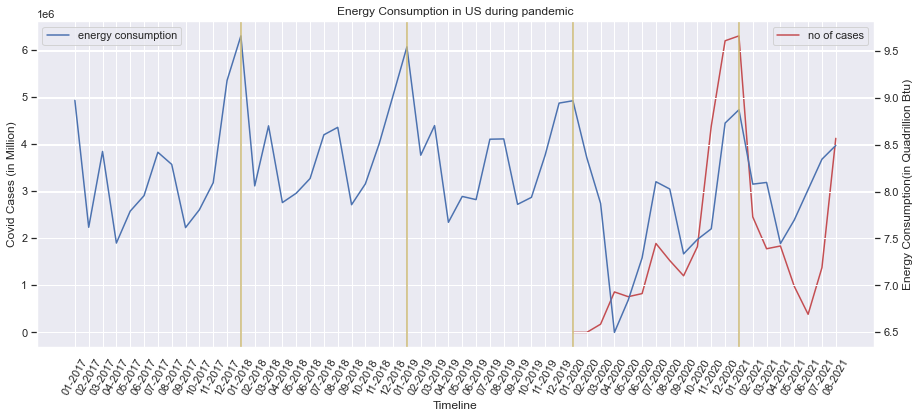

In [37]:
main.compare_monthly_energy_with_covid(primary_energy_consump, df)

In [38]:
covid_df = pd.read_csv('WHO-COVID-19-global-data.csv',parse_dates=['Date_reported'],dtype={'New_cases' : np.int32,
'Cumulative_cases':np.int32,'New_deaths':np.int32,'Cumulative_deaths':np.int32})
fuel_prince_df = pd.read_excel('T71.xlsx',skiprows=18,nrows=14)
energy_US = pd.read_excel('Table_1.3_Primary_Energy_Consumption_by_Source (1).xlsx',skiprows=10)


In [39]:
fuel_df = main.clean_fuel_price(fuel_prince_df)


In [40]:
main.change_to_datetime(fuel_df)

In [41]:
monthly_covid_new_cases = main.get_monthly_covid_df(dataf = covid_df,country_name='all')


In [42]:
covid_newcases_fuel_data = pd.merge(monthly_covid_new_cases,fuel_df,on='Date/Time',how='outer')

In [43]:
covid_newcases_fuel_data.sort_values(by='Date/Time',inplace=True)

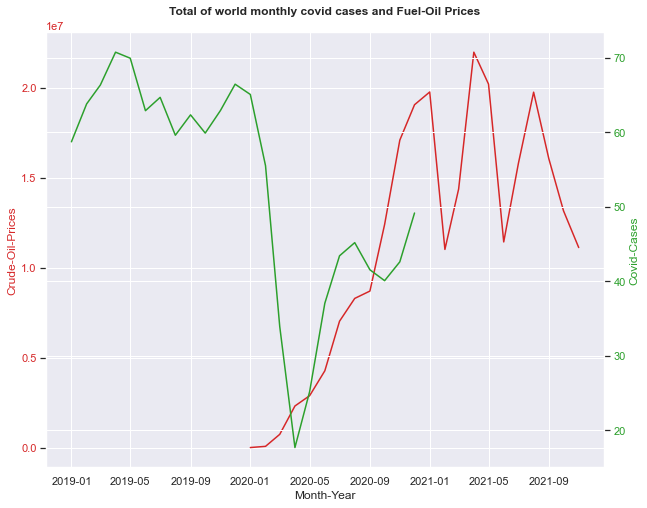

In [44]:
# Creating dataset

x = covid_newcases_fuel_data['Date/Time']
#dataset_1 = np.exp(x**0.25) - np.exp(x**0.5)
#dataset_2 = np.sin(0.4 * np.pi * x**0.5) + np.cos(0.8 * np.pi * x**0.25)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Crude-Oil-Prices', color = color)
ax1.plot(x, covid_newcases_fuel_data['New_cases'], color = color)
ax1.tick_params(axis ='y', labelcolor = color)

# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('Covid-Cases', color = color)
ax2.plot(x, covid_newcases_fuel_data['OPEC - ORB'], color = color)
ax2.tick_params(axis ='y', labelcolor = color)

# Adding title
plt.title('Total of world monthly covid cases and Fuel-Oil Prices\n', fontweight ="bold")

# Show plot
plt.show()



In [45]:
# selecting all rows except first
energy_US = energy_US.iloc[1: , :]

In [46]:
main.change_to_datetime(energy_US)

In [47]:
# ref->  https://stackoverflow.com/questions/53668421/replace-a-string-value-with-nan-in-pandas-data-frame-python
energy_US = energy_US.replace('Not Available', np.nan)


In [48]:
# changing the datatypes
for col in [col for col in energy_US.columns if 'Month' not in col]:
    energy_US[col] = energy_US[col].astype(float)

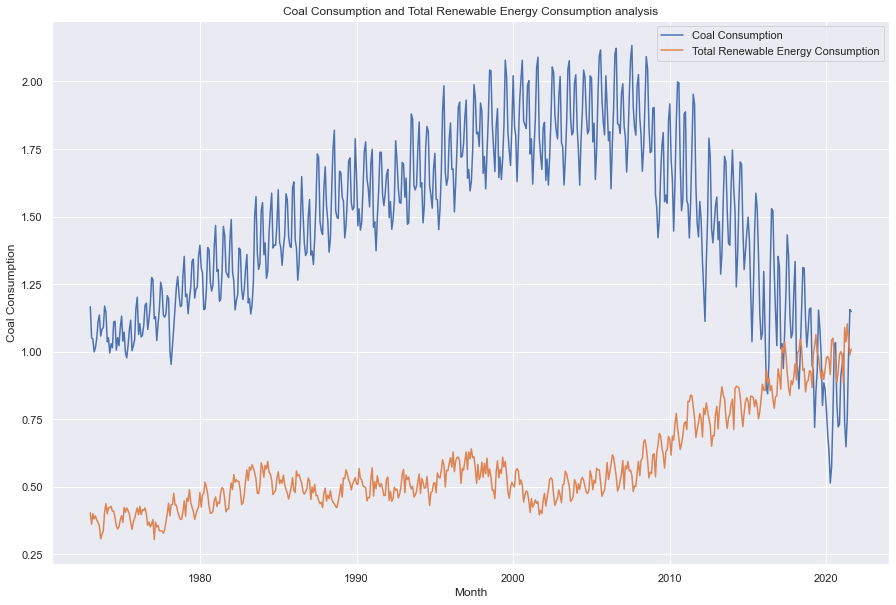

In [49]:
main.energy_plot_func('Coal Consumption','Total Renewable Energy Consumption',df = energy_US)

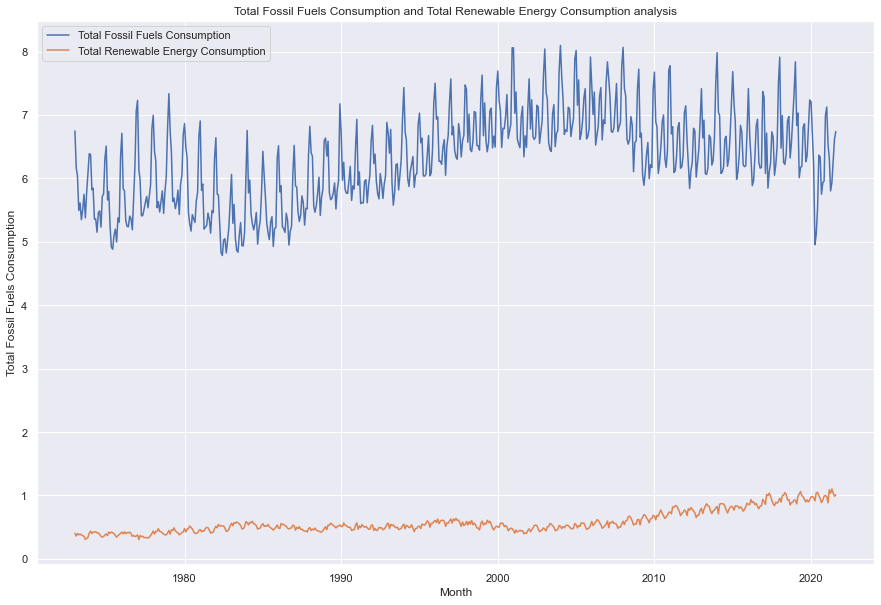

In [50]:
main.energy_plot_func('Total Fossil Fuels Consumption','Total Renewable Energy Consumption',df = energy_US)

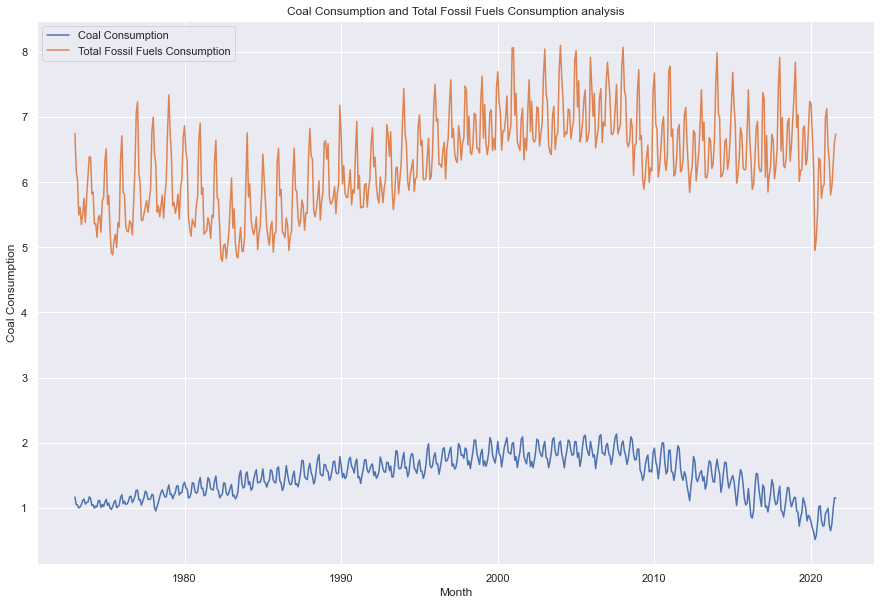

In [51]:
main.energy_plot_func('Coal Consumption','Total Fossil Fuels Consumption',df = energy_US)

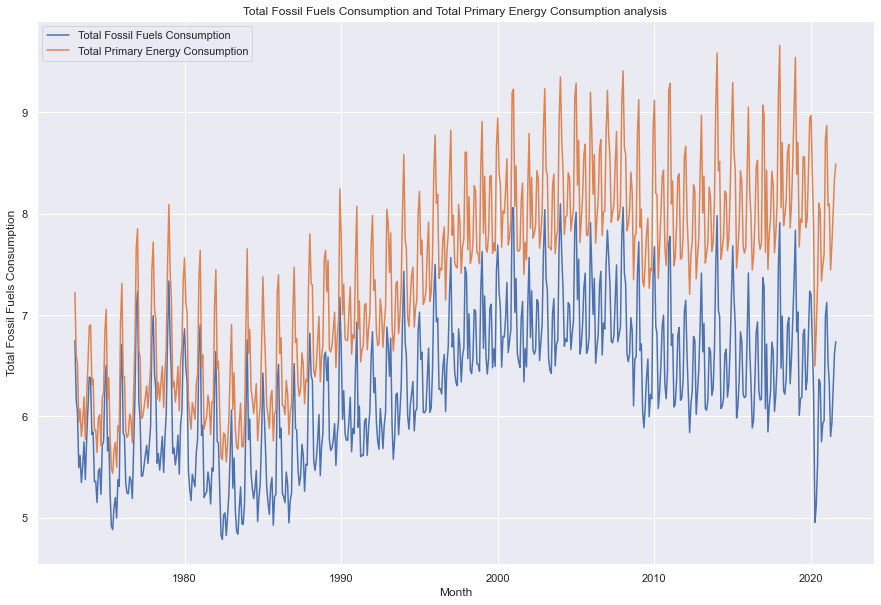

In [52]:
main.energy_plot_func('Total Fossil Fuels Consumption','Total Primary Energy Consumption',df = energy_US)